# PCA(Principal Component Analysis)

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

### Iris dataset을 통해서 PCA 수행

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()

In [24]:
# StandardScaler사용하여 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_std = scaler.fit_transform(iris.data)

#### 1) Numpy로 구하기

In [25]:
# 공분산 행렬 구하기
iris_cov = np.dot(iris_std.T, iris_std) / len(iris_std)
iris_cov

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [26]:
np.cov(iris_std.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [27]:
# 표본집단에 대한 공분산
np.dot(iris_std.T, iris_std) / (len(iris_std) - 1)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [28]:
# 고유벡터, 고유값 구하기
eig_vals, eig_vecs = np.linalg.eig(iris_cov)
eig_vals

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [29]:
eig_vecs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [30]:
# 주성분 PC1
PC1 = np.dot(iris_std, eig_vecs.T[0].reshape(-1, 1))
PC1[:5]

array([[-2.26470281],
       [-2.08096115],
       [-2.36422905],
       [-2.29938422],
       [-2.38984217]])

In [31]:
# 주성분 PC2
PC2 = np.dot(iris_std, eig_vecs.T[1].reshape(-1, 1))
PC2[:5]

array([[-0.4800266 ],
       [ 0.67413356],
       [ 0.34190802],
       [ 0.59739451],
       [-0.64683538]])

In [32]:
iris_PCA = pd.DataFrame({'PC1': PC1.reshape(-1,), 'PC2': PC2.reshape(-1,), 'species': iris.target})
iris_PCA.head()

,PC1,PC2,species
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0


#### 2) 사이킷 런으로 구하기

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [34]:
# fit() 과 transform() 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_std)
iris_pca = pca.transform(iris_std)
print(iris_pca.shape)

(150, 2)


In [35]:
iris_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [36]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

### 데이터 시각화

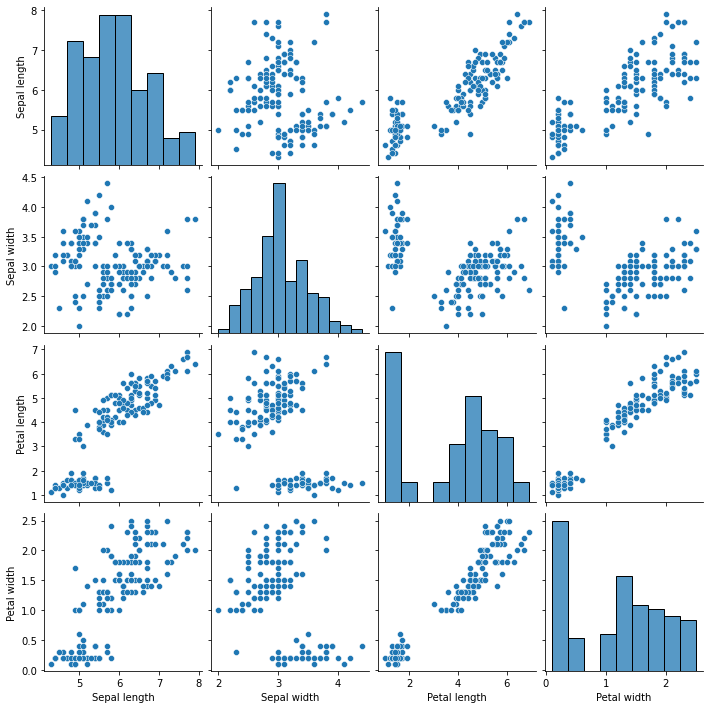

In [37]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
iris_df = pd.DataFrame(data=iris.data, columns=columns)
sns.pairplot(iris_df);

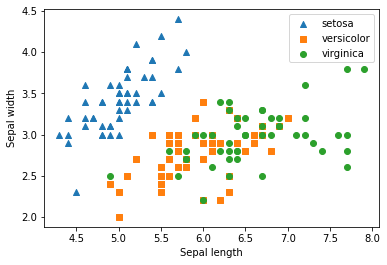

In [38]:
iris_df['species'] = iris.target
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 
#각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['species']==i]['Sepal length']
    y_axis_data = iris_df[iris_df['species']==i]['Sepal width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=iris.target_names[i])

plt.legend()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### PCA 변환 후 시각화

In [39]:
iris_pca_df = pd.DataFrame(data=iris_pca, columns=['PC1', 'PC2'])
iris_pca_df['species'] = iris.target
iris_pca_df.head()

,PC1,PC2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


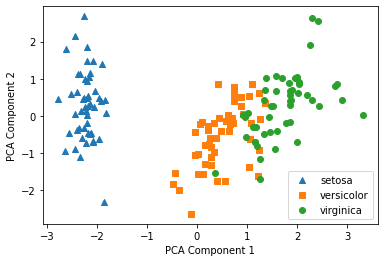

In [40]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = iris_pca_df[iris_pca_df['species']==i]['PC1']
    y_axis_data = iris_pca_df[iris_pca_df['species']==i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=iris.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### 차원 축소하기 전 데이터로 분류

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, test_size=0.3, random_state=2021
)

In [43]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9111111111111111

### 차원 축소한 데이터로 분류

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_pca_df[['PC1','PC2']], iris.target, stratify=iris.target, 
    test_size=0.3, random_state=2021
)

In [45]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9111111111111111